# Integrated Assessment
Modules: Machine Learning for Business 

Student: Danton Prestes - sbs23086

# Question 2

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Data_text_23.csv")

In [3]:
#Here we can see the number of lines and rows (columns) from the dataset.
df.shape

(23006, 41)

In [4]:
df.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,...,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
0,1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,...,0.0,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1
1,2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0
2,3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1
3,4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,...,0.0,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0
4,5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,...,0.0,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              23006 non-null  int64  
 1   X                23006 non-null  int64  
 2   State            23006 non-null  object 
 3   conversation_id  23006 non-null  object 
 4   retweet_count    23006 non-null  int64  
 5   reply_count      23006 non-null  int64  
 6   like_count       23006 non-null  int64  
 7   quote_count      23006 non-null  int64  
 8   Buzz             23006 non-null  int64  
 9   id               23006 non-null  object 
 10  Date1            23006 non-null  object 
 11  OpnHours         23006 non-null  object 
 12  DateDay          23006 non-null  object 
 13  Day              23006 non-null  object 
 14  Time             23006 non-null  object 
 15  3-Phase          23006 non-null  object 
 16  4-phase          23006 non-null  object 
 17  Followers   

In [6]:
pd.set_option('display.max_columns', None)
df.describe()

,Sno,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
count,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,2.300600e+04,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000
mean,11503.500000,828.641833,18.857168,3.595062,139.501304,1.468660,203.262931,5.082265e+05,38.723420,63.853962,4.705857,7.366719,4.433875,1.091667,3.258420,0.632105,0.652306,3.192485,0.053130,0.632105,0.193785,1.431833,0.483109,0.519711,0.219480,1.269799,-1.056377,0.326176
std,6641.404482,776.896316,61.300045,32.241142,537.268359,17.794031,730.136030,5.960315e+05,12.588226,25.410441,4.318090,4.128888,2.664032,2.008155,1.660668,1.651663,1.600454,3.710467,0.518322,1.651663,0.806686,2.318887,1.273838,1.349585,0.828681,0.656546,0.283570,0.770302
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.164000e+03,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.000000
25%,5752.250000,260.000000,4.000000,0.000000,27.000000,0.000000,42.000000,9.132500e+04,31.000000,40.060000,1.850000,4.440000,2.440000,0.000000,2.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
50%,11503.500000,592.000000,9.000000,1.000000,63.000000,1.000000,96.000000,1.901970e+05,40.000000,65.160000,4.000000,6.670000,4.000000,0.000000,2.700000,0.000000,0.000000,2.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
75%,17254.750000,1135.000000,21.000000,3.000000,137.000000,1.000000,208.000000,6.507710e+05,46.000000,88.150000,6.980000,9.520000,5.560000,2.130000,4.000000,0.000000,0.000000,4.880000,0.000000,0.000000,0.000000,2.380000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
max,23006.000000,3685.000000,3519.000000,4580.000000,38244.000000,2546.000000,48864.000000,1.972674e+06,205.000000,99.000000,50.000000,37.500000,30.000000,23.530000,20.000000,30.000000,50.000000,40.000000,15.380000,30.000000,12.730000,33.330000,33.330000,33.330000,14.290000,5.000000,-1.000000,6.000000


In [7]:
# Checking some samples to understand how dataset looks like and if any obvious missing values or 
# any details that needs handling of data. 
df.sample(10)

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,Date1,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
19624,19625,722,UP,S1343460492417802240,29,146,258,9,637,S1343460492417802240,28-12-2020,Non-working Hours,Monday,weekday,Non-buisness hours,Covid Lockdown,Unlocking,517867,Let’s check if you can answer this!\r\nIttar i...,photo,Interaction,44,92.77,11.36,2.27,2.27,0.00,2.27,2.27,2.27,2.27,0.0,2.27,0.00,2.27,0.00,4.55,0.0,1,-1,0
6759,6760,628,Kerala,S1325470653823152130,44,5,384,5,526,S1325470653823152130,08-11-2020,Working Hours,Sunday,weekend,Non-buisness hours,Covid Lockdown,Unlocking,1972674,Here’s why you shouldn’t miss out on the uniqu...,photo,Information,34,57.59,11.76,5.88,5.88,0.00,5.88,0.00,0.00,0.00,0.0,0.00,0.00,2.94,2.94,2.94,0.0,1,-1,0
12428,12429,1428,Odisha,S1122889397299335169,1,0,26,1,29,S1122889397299335169,29-04-2019,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,1213817,"A ritual to mock Ravana’s antipathy, handlooms...",link,Information,39,40.06,0.00,2.56,2.56,0.00,2.56,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1,-1,0
22107,22108,1762,Uttarkhand,S1416681403014471680,15,4,143,0,196,S1416681403014471680,18-07-2021,Non-working Hours,Sunday,weekend,Non-buisness hours,Post Lockdown,Post Lockdown,91325,"There’s nothing more exciting, liberating and ...",photo,Information,41,26.81,12.20,9.76,4.88,2.44,2.44,0.00,2.44,4.88,0.0,0.00,0.00,4.88,0.00,0.00,0.0,1,-1,0
13009,13010,2009,Odisha,S1210815763738529796,2,1,34,1,42,S1210815763738529796,28-12-2019,Non-working Hours,Saturday,weekend,Non-buisness hours,Pre-Covid,Pre-Covid,1213817,#HappyFaces Kids love to build sand castles. B...,video,Interaction,37,99.00,0.00,10.81,5.41,0.00,5.41,0.00,0.00,2.70,0.0,0.00,5.41,0.00,0.00,0.00,0.0,2,-1,1
14831,14832,1517,Rajasthan,S1288869273100619776,8,3,47,0,77,S1288869273100619776,30-07-2020,Working Hours,Thursday,weekday,Business hours,Covid Lockdown,Unlocking,190197,#AmazingFactsOnBaran\r\n\r\nSituated 40 km awa...,text,Information,46,40.06,6.52,0.00,0.00,0.00,0.00,0.00,0.00,2.17,0.0,0.00,0.00,2.17,4.35,0.00,0.0,1,-2,1
20782,20783,437,Uttarkhand,S1161865399874379777,0,0,17,0,17,S1161865399874379777,15-08-2019,Non-working Hours,Thursday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,91325,Flag hosting ceremony was held at the premises...,photo,Information,38,40.06,5.26,2.63,2.63,0.00,2.63,0.00,0.00,7.89,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1,-1,0
1243,1244,470,Delhi,S1275695994093666306,1,0,5,0,8,S1275695994093666306,24-06-2020,Non-working Hours,Wednesday,weekday,Non-buisness hours,Covid Lockdown,Unlocking,19623,Your Wait is Finally Over!\r\n\r\nThe virtual ...,photo,Information,52,93.13,3.85,11.54,9.62,3.85,1.92,3.85,1.92,5.77,0.0,3.85,0.00,1.92,0.00,0.00,0.0,1,-1,0
4448,4449,43,J and K,S1227050915317899270,27,2,128,1,213,S1227050915317899270,11-02-2020,Non-working Hours,Tuesday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,96691,Skiing powder on a sunny day at Gulmarg is li...,photo,Interaction,34,93.56,0.00,8.82,2.94,0.00,2.94,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1,-1,0
13540,13541,226,Rajasthan,S1130444332954034178,5,3,41,0,62,S1130444332954034178,20-05-2019,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,190197,This is #ShashisRajasthanDiary. A beautiful ch...,photo,Interaction,44,66.75,0.00,4.55,2.27,0.00,2.27,0.00,0.00,2.27,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1,-1,0


In [8]:
#checking for missing values
df.isna().sum()

Sno                0
X                  0
State              0
conversation_id    0
retweet_count      0
reply_count        0
like_count         0
quote_count        0
Buzz               0
id                 0
Date1              0
OpnHours           0
DateDay            0
Day                0
Time               0
3-Phase            0
4-phase            0
Followers          0
Status text        0
Vividness          0
ContentType        0
WC                 0
Clout              0
Cognition          0
Affect             0
emotion            0
emo_pos            0
emo_neg            0
we                 0
tentat             0
Drives             0
i                  0
we.1               0
they               0
insight            0
cause              0
discrep            0
certitude          0
Positive           0
Negative           0
Total_Sentiment    0
dtype: int64

In [10]:
# Convert the 'Date' column to datetime
df['Date1'] = pd.to_datetime(df['Date1'])

# Sort the DataFrame based on the 'Date' column
df_sorted = df.sort_values(by='Date1')

df = df.sort_values(by='Date1').reset_index(drop=True)

In [11]:
df.set_index("Date1", inplace=True)
df.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
Date1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-25,9455,1,MP,S1110030613996806144,9,0,33,1,60,S1110030613996806144,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,625186,"Throwing of vibrant colours, splashing of colo...",photo,Interaction,47,52.76,2.13,10.64,8.51,6.38,2.13,0.0,0.00,2.13,0.00,0.0,0.00,2.13,0.0,0.0,0.0,1,-1,0
2019-03-25,13317,2,Rajasthan,S1110162253066760192,5,6,30,0,57,S1110162253066760192,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,190197,Rejuvenating Chaach from Rajasthan or Refreshi...,Poll,Interaction,20,89.50,10.00,15.00,0.00,0.00,0.00,0.0,5.00,5.00,0.00,0.0,0.00,5.00,0.0,0.0,0.0,1,-1,0
2019-03-25,13316,1,Rajasthan,S1110055972641406977,15,33,102,1,213,S1110055972641406977,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,190197,The world's largest cannon is placed at this f...,photo,Interaction,33,58.11,6.06,3.03,3.03,0.00,3.03,0.0,6.06,0.00,0.00,0.0,0.00,6.06,0.0,0.0,0.0,1,-1,0
2019-03-25,12356,1355,Odisha,S1110121617693171713,5,0,28,2,43,S1110121617693171713,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,1213817,#MondayMotivation on Art Trail to Raguhrajpur....,photo,Interaction,30,98.75,6.67,6.67,6.67,0.00,6.67,0.0,0.00,0.00,0.00,0.0,3.33,3.33,0.0,0.0,0.0,1,-1,0
2019-03-25,18904,1,UP,S1110062193582768129,12,0,45,1,81,S1110062193582768129,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,517867,"Kans Qila in Mathura, constructed by Raja Mans...",photo,Information,48,18.97,6.25,6.25,2.08,0.00,2.08,0.0,2.08,0.00,2.08,0.0,0.00,4.17,0.0,0.0,0.0,4,-1,3


Before resampling, understanding the dates (older and newest posts)

In [15]:
dfr = df.resample("D")

In [16]:
dfr

In [17]:
dfr = dfr.count()
dfr.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
Date1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-25,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2019-03-26,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2019-03-27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2019-03-28,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2019-03-29,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


<AxesSubplot:xlabel='Date1'>

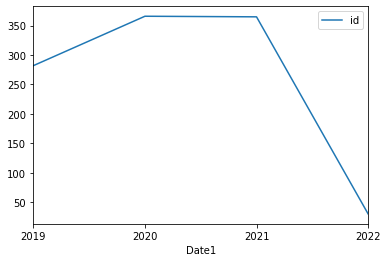

In [18]:
dfr.resample("Y").count().plot(y='id')

Conclusion here is that resampling worked as expected. we can see the posts grouped by dates (yearly).
An observation was that the values became flat after resampling. We can see the same figures across the rows for the days. 
Tried resampling with other parameters like, monthly, weekly and daily. 

<AxesSubplot:xlabel='Date1'>

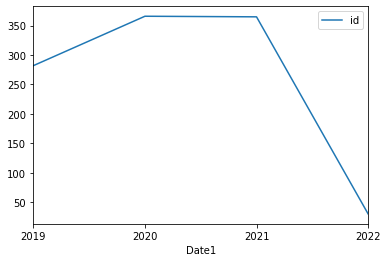

In [19]:
#Yearly

dfr.resample("Y").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

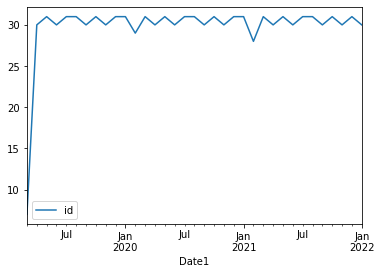

In [20]:
#Monthly

dfr.resample("M").count().plot(y='id')

<AxesSubplot:xlabel='Date1'>

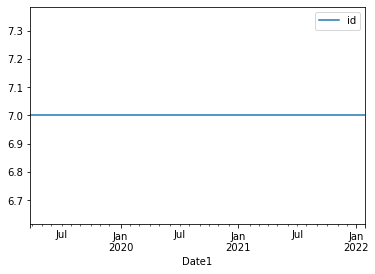

In [21]:
#Weekly

dfr.resample("W").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

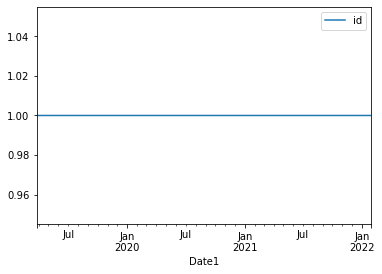

In [22]:
dfr.resample("D").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

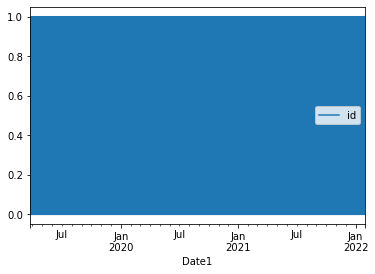

In [23]:
dfr.resample("10T").count().plot(y="id")

In [ ]:
#Resampling to group together figures by date


# Example: Create a DataFrame with a date-only index
date_rng = pd.date_range(start='2019-01-01', end='2023-01-10', freq='D')
df_r = pd.DataFrame({'values': np.random.randn(len(date_rng))}, index=date_rng)

# Display the original DataFrame
print("Original DataFrame:")
print(df_r)

# Resample to daily frequency (mean of values for each day)
Daily_resampled = df_r.resample(rule='D').mean()

# Display the resampled DataFrame
print("\nResampled DataFrame (Daily):")
print(Daily_resampled)


In [ ]:
df['Total_Sentiment'].plot.hist()
plt.title('Histogram Example')
plt.show()